In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

random_state = 0

In [3]:
df = np.genfromtxt('australian.dat')
df = pd.DataFrame(data = df)
df.shape

(690, 15)

In [4]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object

In [5]:
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'Y']
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,1.0,22.08,11.46,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.00,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.75,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.50,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.17,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      690 non-null    float64
 1   X2      690 non-null    float64
 2   X3      690 non-null    float64
 3   X4      690 non-null    float64
 4   X5      690 non-null    float64
 5   X6      690 non-null    float64
 6   X7      690 non-null    float64
 7   X8      690 non-null    float64
 8   X9      690 non-null    float64
 9   X10     690 non-null    float64
 10  X11     690 non-null    float64
 11  X12     690 non-null    float64
 12  X13     690 non-null    float64
 13  X14     690 non-null    float64
 14  Y       690 non-null    float64
dtypes: float64(15)
memory usage: 81.0 KB


In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [8]:
X = df.drop('Y', axis = 1)
y = df['Y']

In [9]:
df1 = df.copy()

# Onehot encoding for categorical features
encode_rules = ColumnTransformer(
    transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'), [3, 4, 5, 11])],
    remainder = 'passthrough'
)

X = encode_rules.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
print(X_train.shape, X_test.shape)

(552, 38) (138, 38)


## Decision Tree

1. Khảo sát với các giá trị khác nhau của **'max_depth'**

Text(0.5, 1.0, 'DT validation curve for max_depth')

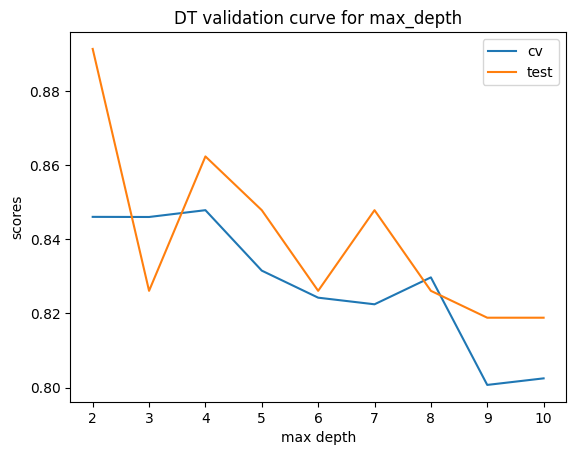

In [10]:
cv_accuracies_by_depth, test_accuracies_by_depth = [], []
max_depth_values = np.arange(2, 11)
for curr_max_value in max_depth_values:
    tree = DecisionTreeClassifier(random_state = random_state, max_depth = curr_max_value)
    
    # cross-validation
    val_scores= cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 5, scoring = 'accuracy')
    cv_accuracies_by_depth.append(val_scores.mean())
    
    # test
    tree.fit(X_train, y_train)
    curr_pred = tree.predict(X_test)
    test_accuracies_by_depth.append(accuracy_score(curr_pred, y_test))

# Plot
plt.plot(max_depth_values, cv_accuracies_by_depth, label = 'cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label = 'test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')

In [11]:
parameter = {
    'max_depth': np.arange(2, 11),
    'min_samples_split' : np.arange(2, 202, 20),
    'min_samples_leaf' : np.arange(1, 201, 20),
    'max_leaf_nodes': (2, 5, 10, 20, 50),
    'class_weight': ['balanced', None]
}
grid = GridSearchCV(DecisionTreeClassifier(), parameter, verbose = 1, n_jobs = -1)
gridfit = grid.fit(X_train,y_train)
print(gridfit.best_params_)
y_pred = gridfit.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits
{'class_weight': None, 'max_depth': np.int64(4), 'max_leaf_nodes': 5, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}
0.8623188405797102


## Random Forest

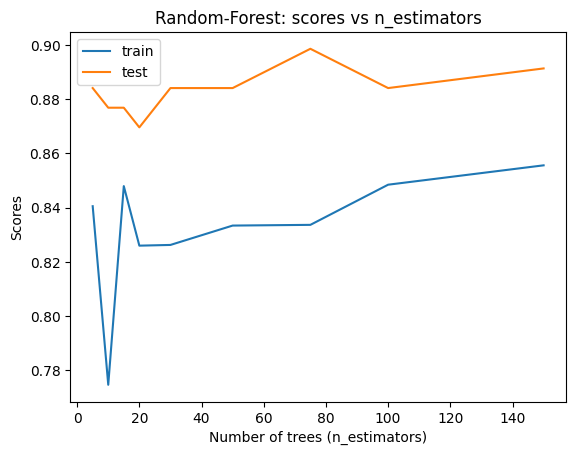

In [12]:
num_trees = [5, 10, 15, 20, 30, 50, 75, 100, 150]
train_acc = []
test_acc = []

for ntrees in num_trees:
    rf = RandomForestClassifier(n_estimators = ntrees, random_state = random_state, n_jobs = -1).fit(X_train, y_train)
    temp_train_acc = cross_val_score(rf, X_test, y_test, cv = 5, scoring = 'accuracy')
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(X_test), y_test))

plt.plot(num_trees, train_acc, label='train')
plt.plot(num_trees, test_acc, label='test')
plt.legend()
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('Scores')
plt.title('Random-Forest: scores vs n_estimators');

In [13]:
parameter = {
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [1, 10, 30, 60],
    'max_features': [1.0, 'log2', 'sqrt'],
    'n_estimators': [1, 2, 3, 5, 10, 20, 50, 100, 170]
}
grid = GridSearchCV(RandomForestClassifier(random_state = random_state), parameter, n_jobs = -1, verbose = 1)
gridfit = grid.fit(X_train,y_train)
print(gridfit.best_params_)
y_pred = gridfit.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 1, 'n_estimators': 100}
0.8840579710144928
